In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.ndimage as scp

def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)



In [71]:
def generate(x_dim, y_dim):
    my_dpi = 100
    arr = np.zeros((x_dim,y_dim))
    for i in range(20000):
        x=random.randint(0-10,x_dim+10)
        y=random.randint(0-10,x_dim+10)
        
        fwhm=10
        arr=arr+makeGaussian(x_dim,fwhm=fwhm,center=[x,y])
    """
    for i in range(1000):
        xy = np.where(arr == np.min(arr))
        r=20
        x=xy[1]+random.randint(-r,r)
        y=xy[0]+random.randint(-r,r)
        fwhm=10
        arr=arr+makeGaussian(x_dim,fwhm=fwhm,center=[x,y])
    #arr=np.log(arr)
    """
    arr = np.abs(arr - np.min(arr))/np.max(arr)
    
    #arr = np.where(arr<0.1,arr+random.random()*1/arr,arr)
    #print(arr)
    return arr
    

arr=generate(400,400)



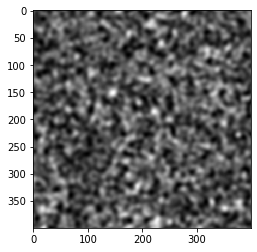

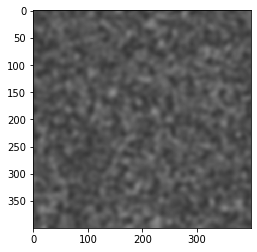

[[0.3127761  0.29343524 0.27346089 ... 0.29310858 0.29166626 0.29221092]
 [0.28758461 0.26523427 0.24204774 ... 0.31068591 0.30961172 0.30824163]
 [0.26779142 0.2431526  0.21743732 ... 0.32821129 0.32822604 0.32571223]
 ...
 [0.15882953 0.16651604 0.17346722 ... 0.13299456 0.12990834 0.1222888 ]
 [0.17420901 0.18466308 0.19298537 ... 0.15341759 0.14881642 0.139876  ]
 [0.1935527  0.20591321 0.21457507 ... 0.16820794 0.16275815 0.15350661]]


In [83]:

arr6 =scp.gaussian_filter(arr,2)
for i in range(4):
    arr=generate(400,400)
plt.imshow(arr, interpolation='none',cmap="gray",norm=None)
plt.show()
plt.imshow(arr6, interpolation='none',cmap="gray",norm=None,vmin=-0.4,vmax=1.5)
plt.show()
print(arr)